<a href="https://colab.research.google.com/github/yrc00/DACON/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4/%EB%94%B0%EB%A6%89%EC%9D%B4_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [서울시 따릉이 대여량 예측 경진대회](https://dacon.io/competitions/open/235576/overview/description)

## 개요

- **목표**: DACON의 서울시 따릉이 대여량 예측 경진대회에서 높은 점수를 얻기
- **학습 데이터**: 서울시 따릉이 대여량 예측 경진대회에서 제공하는 train 데이터
- **사용 언어**: Python
- **평가 산식**: RMSE

## 데이터

제공 데이터 파일: train.csv, test.csv, submission.csv

<br>

**train.csv / test.csv**

- 서울시 마포구의 날짜별, 시간별 기상상황과 따릉이 대여 수 데이터
- 주어진 데이터의 값들은 모두 수치형 데이터이다.

| 컬럼 | 설명 | 구분 |
| --- | --- | --- |
| id | 고유 id | feature |
| hour | 시간 | feature |
| temperature | 기온 | feature |
| precipitation | 비가 오지 않았으면 0,
비가 오면 1 | feature |
| windspeed | 풍속 (평균) | feature |
| humidity | 습도 | feature |
| visibility | 시정, 시계
(특정 기상 상태에 따른 가시성을 의미) | feature |
| ozone | 오존 | feature |
| pm10 | 미세먼지
(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지) | feature |
| pm2.5 | 미세먼지
(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지) | feature |
| count | 시간에 따른 따릉이 대여 수 | target |

<br>

**submission.csv**

- 제출 파일

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/DACON/따릉이/data

/content/drive/MyDrive/DACON/따릉이/data


In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
import pandas as pd

test = pd.read_csv('test.csv')
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [ ]:
import pandas as pd

submission = pd.read_csv('submission.csv')
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


# 데이터 살펴보기

## train

In [ ]:
train.shape

(1459, 11)

- train 데이터셋은 1459개의 데이들로 구성
- 총 11개의 컬럼이 존재

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


- 각 컬럼의 데이터 타입은 id, hour은 int, 나머지는 float이다.
- precipitation은 범주형 데이터이고, count는 시간에 따른 따릉이 대여량이기 때문에 이 두 컬럼은 정수로 나타낼 수 있다.
- 데이터의 형도 모델 성능에 영향을 미칠 수 있기 때문에 이 두 변수의 int로 변환했을 때와 float으로 그대로 두었을 때 모델의 성능 차이를 확인해볼 수 있을 것이다.
- 전체 데이터는 1459개이고, 일부 컬럼들의 Non-Null Count가 1459개가 되지 않아 결측치를 갖는 데이터들이 있는 것을 확인할 수 있다.

### **결측치**

In [ ]:
# 결측치 데이터의 개수
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

- id, hour, count를 제외한 컬럼들은 결측치를 갖는다.
- hour_bef_pm2.5의 결측치 개수가 가장 많다

In [ ]:
# 결측치 데이터의 비율
train.isnull().mean()

id                        0.000000
hour                      0.000000
hour_bef_temperature      0.001371
hour_bef_precipitation    0.001371
hour_bef_windspeed        0.006169
hour_bef_humidity         0.001371
hour_bef_visibility       0.001371
hour_bef_ozone            0.052090
hour_bef_pm10             0.061686
hour_bef_pm2.5            0.080192
count                     0.000000
dtype: float64

<Axes: >

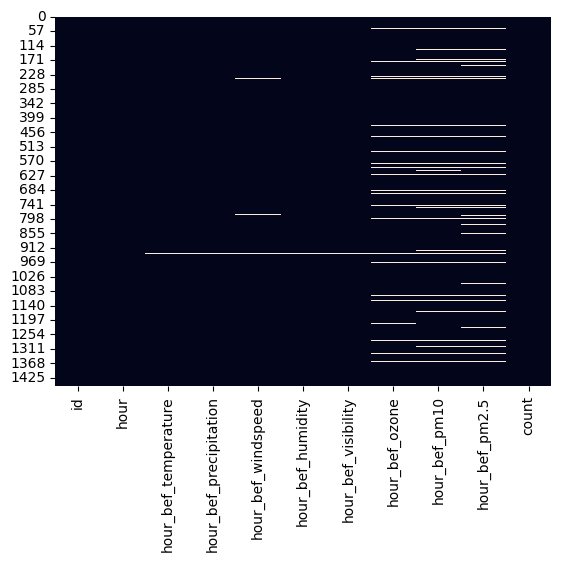

In [ ]:
import seaborn as sns

sns.heatmap(train.isnull(), cbar=False)

- 비율로 보았을 때 가장 결측치가 많은 hour_bef_pm2.5의 결측치 비율이 약 8%
- 결측치를 갖는 컬럼의 개수가 적고 대부분의 결측치를 갖는 데이터들이 두 개 이상의 결측치를 갖기 때문에 결측치를 갖는 행들을 삭제해도 좋을 것 같다.
- 하지만 test 데이터도 같은 방식으로 전처리를 해야 하기 때문에 대체 방법으로 진행할 예정이다.

### **이상치**

In [ ]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


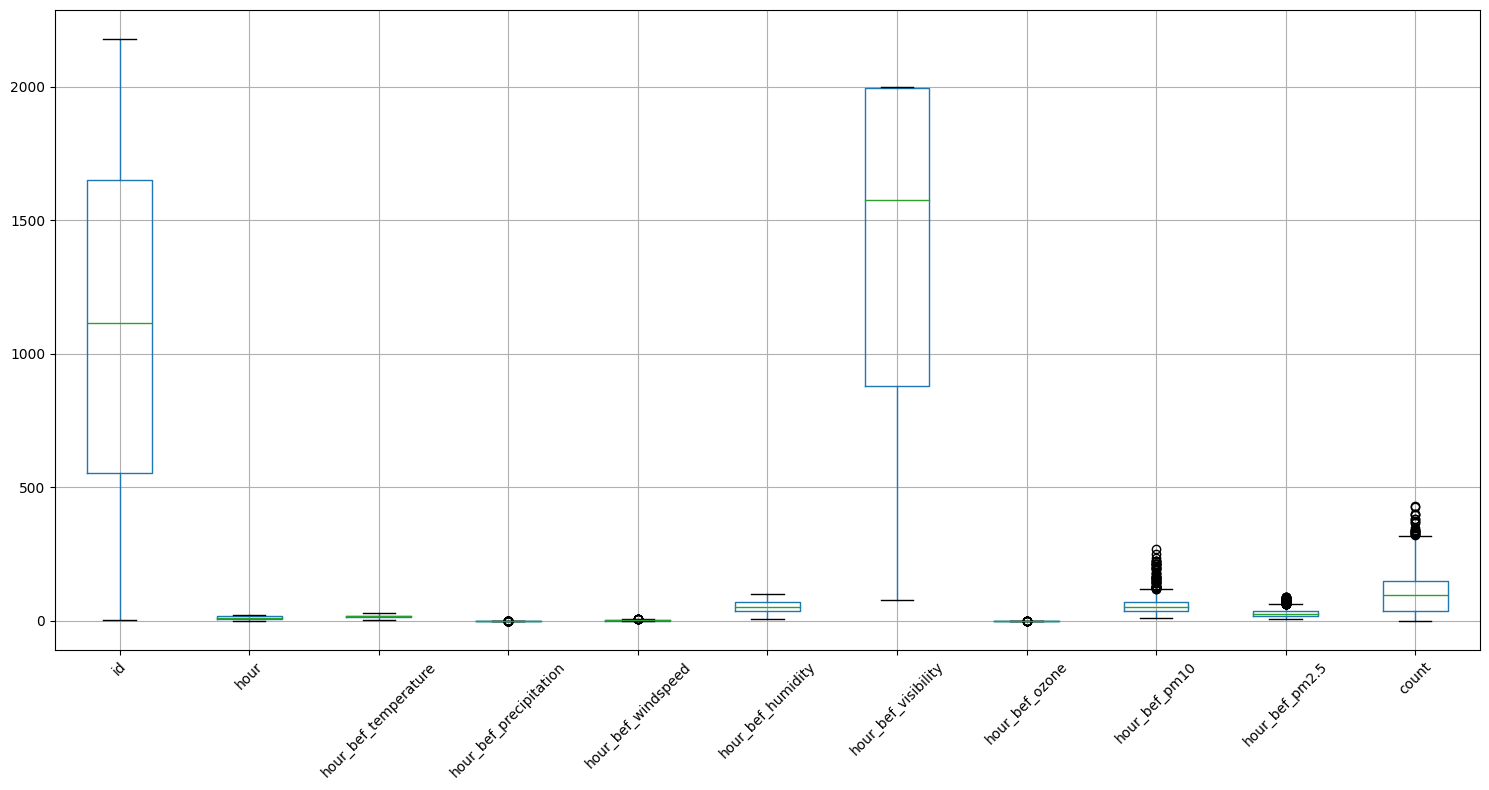

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
train.boxplot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 결측치가 많이 존재하는 hour_bef_pm10과 hour_bef_pm2.5에 이상치도 많이 존재함을 확인
- 이 두 수치는 미세먼지를 나타내는 지표로 이상치 값들이 실제 값들을 가능성이 있다.

### **상관관계**

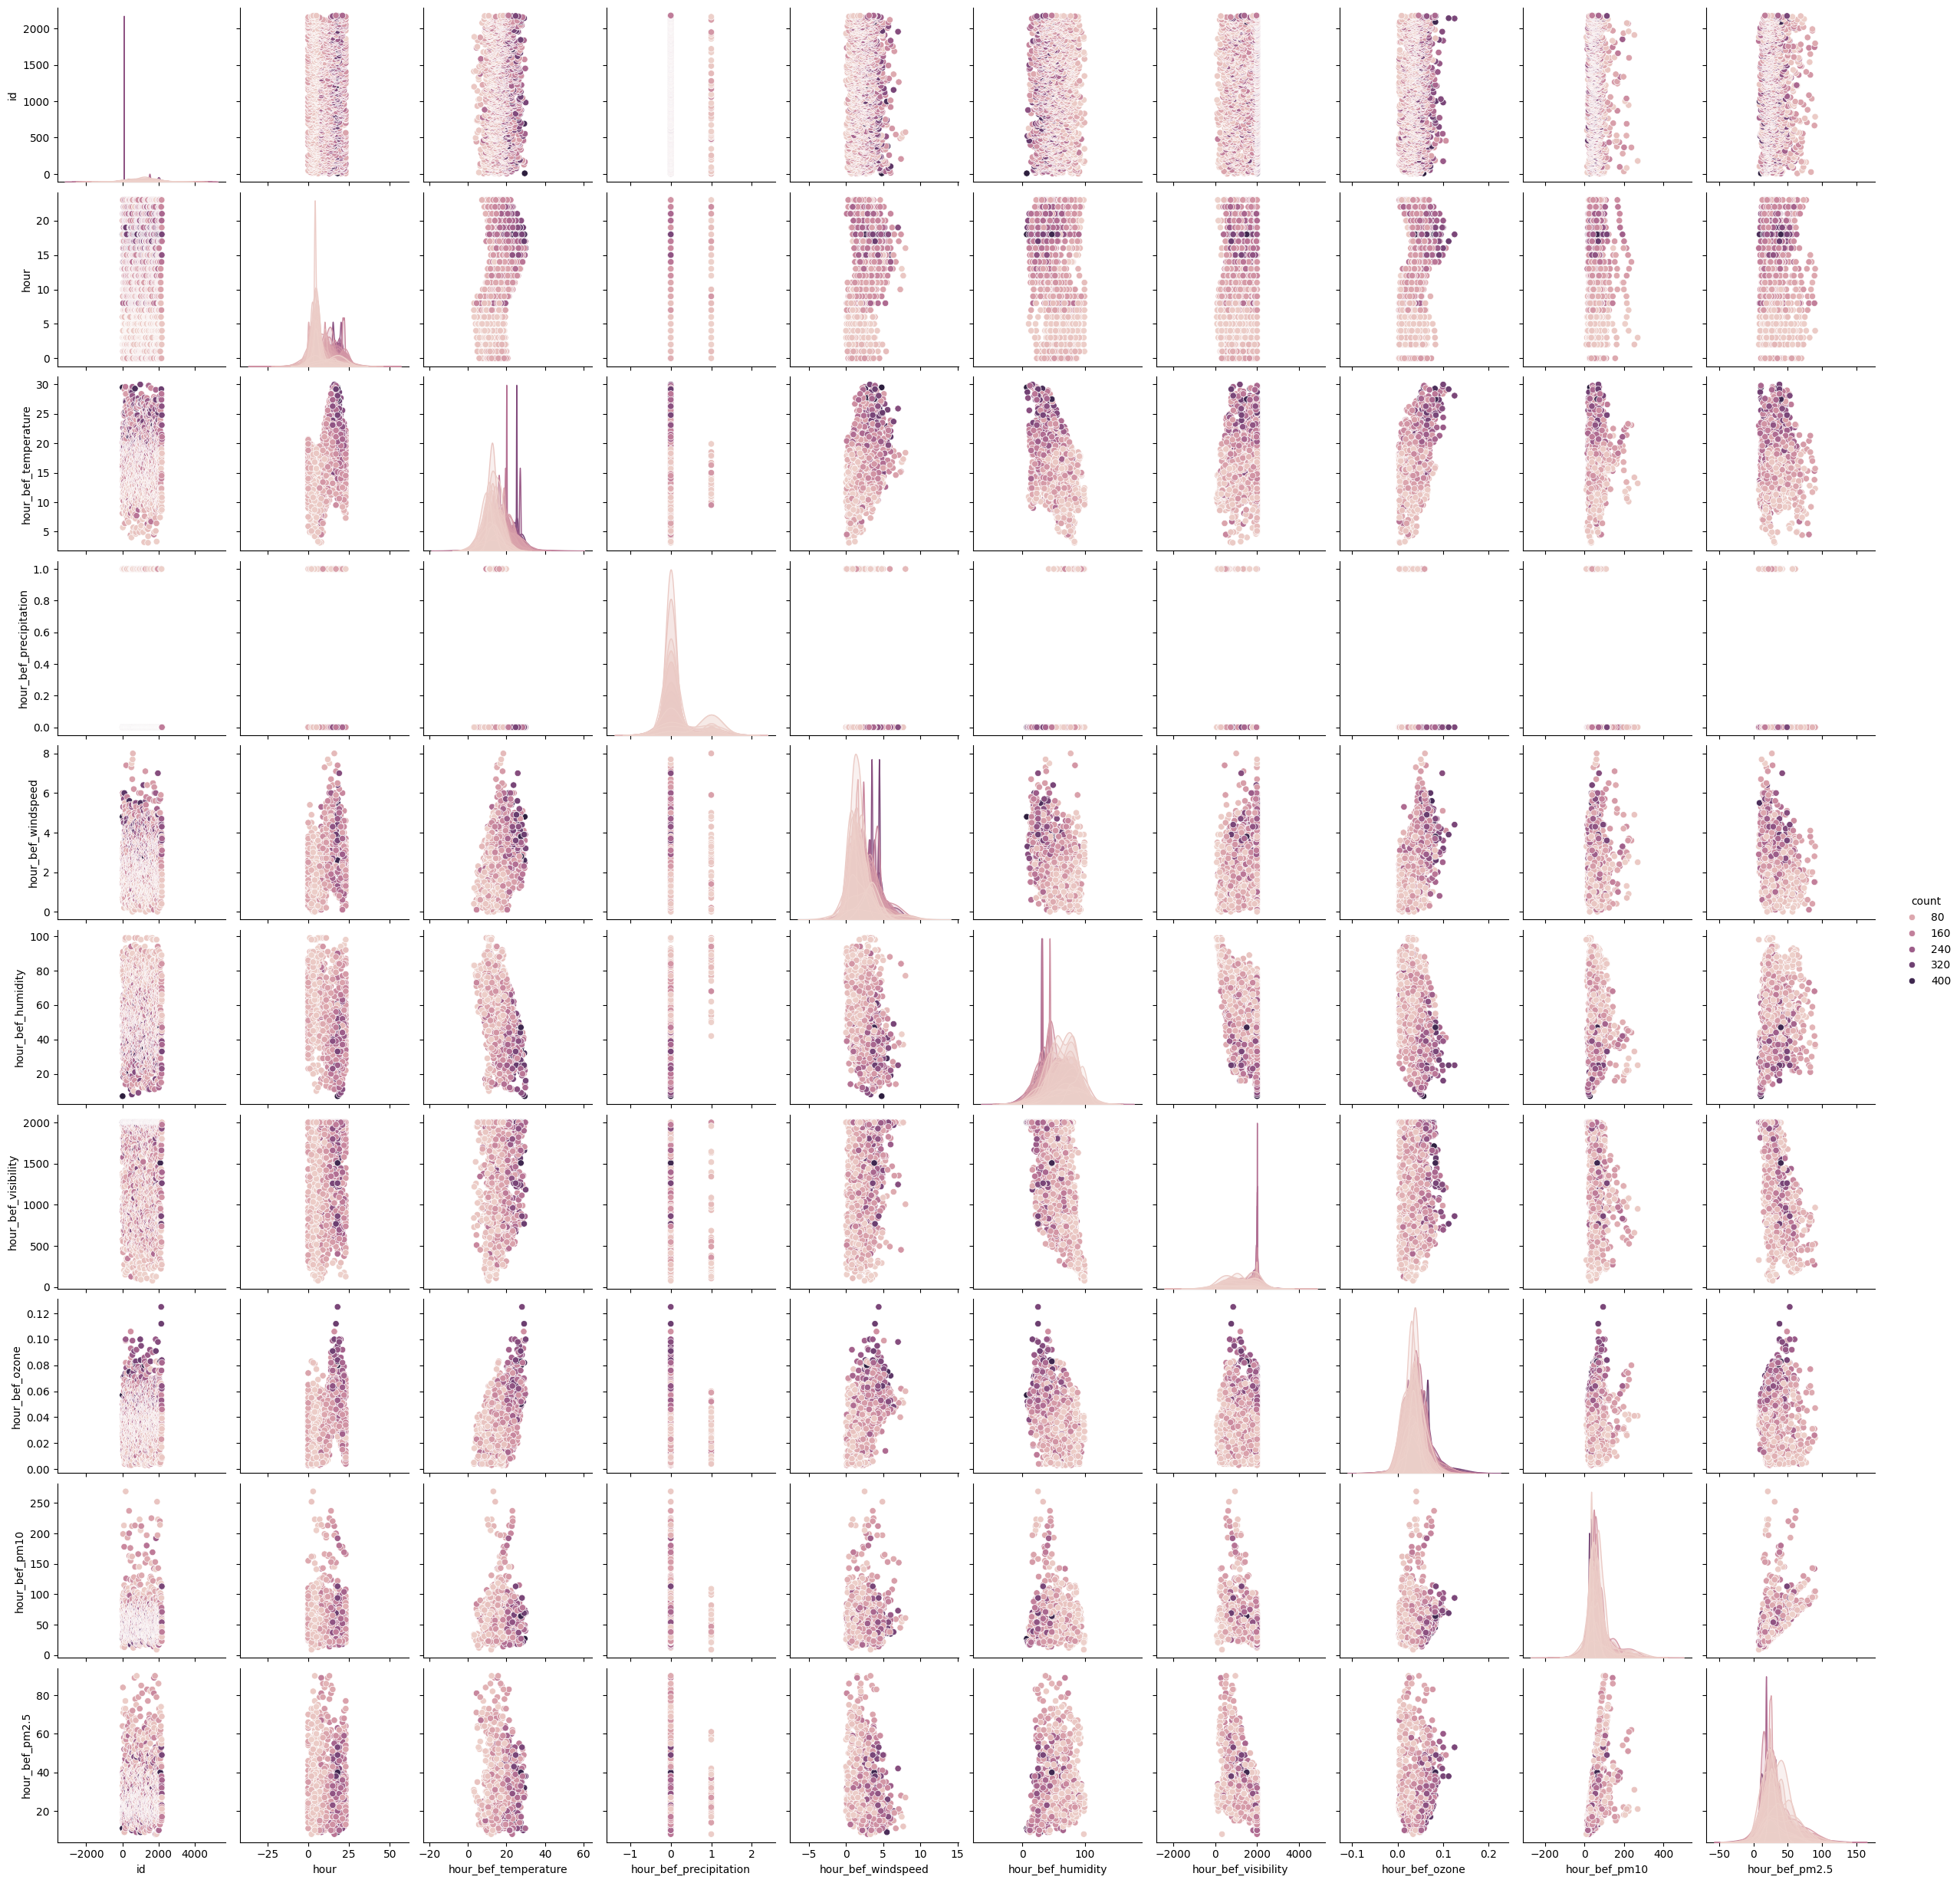

In [ ]:
import seaborn as sns

sns.pairplot(train, hue = 'count')

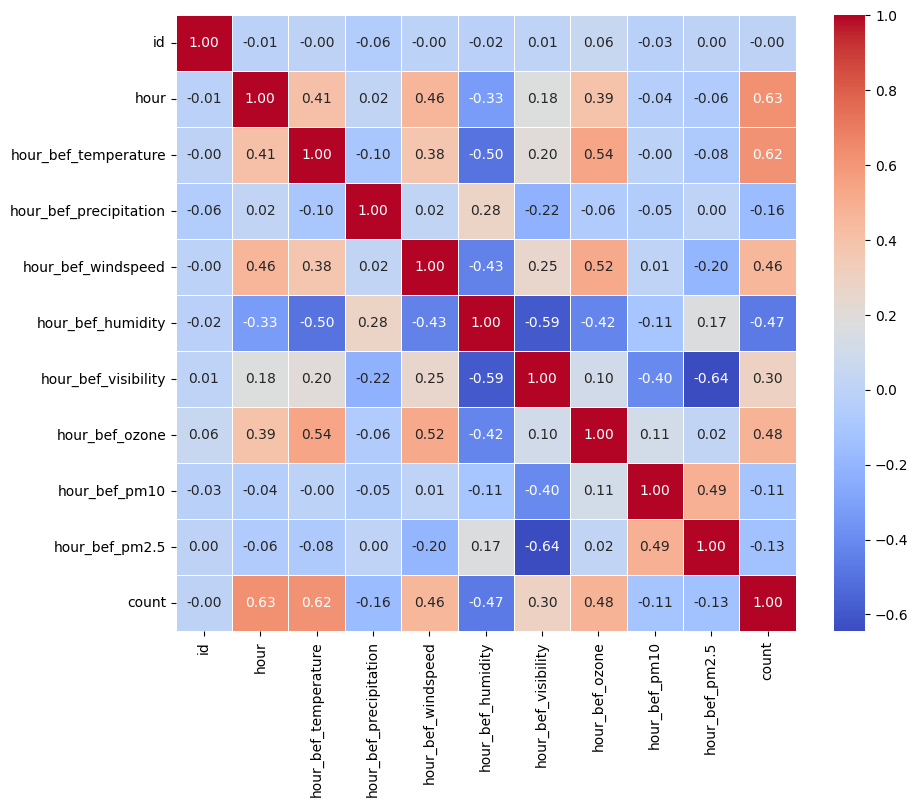

In [ ]:
correlation_matrix = train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

- pairplot은 데이터가 많아 상관관계 파악이 어려워 히트맵을 그려보았다.
- 피처들 간의 상관관계
    - hour_bef_pm2.5, hour_bef_pm10와 hour_bef_visibility는 음의 상관관계를 갖는다
    → 미세먼지 농도가 높아질수록 가시거리가 짧아지기 때문
    - hour_bef_ozone, hour_bef_windspeed와 hour_bef_termperature는 양의 상관관계
    → 기온이 높아지면 오존 농도는 올라간다.
    - hour_bef_humidity와 hour_bef_temperature는 음의 상관관계
- count와의 관계
    - 양의 상관관계: hour, hour_bef_temperature, hour_bef_ozone, hour_bef_windspeed, hour_bef_visibility
    - 음의 상관관계: hour_bef_humidity, hour_bef_precipitation, hour_bef_pm_10, hour_bef_pm_2.5
    - 상관관계를 갖지 않음: id, hour_bef_precipitation
- 시간이 늦고, 기온이 높고, 풍속이 빠르고, 오존 농도가 높으면 대여량이 증가한다.
- 습도가 높아지면 대여량이 감소한다.

### **기온별 대여량**

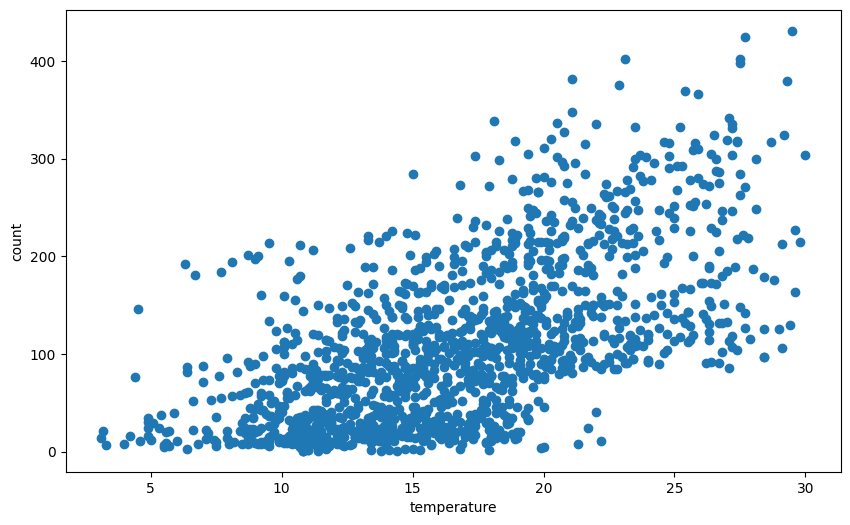

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(train['hour_bef_temperature'], train['count'])
plt.xlabel('temperature')
plt.ylabel('count')
plt.show()

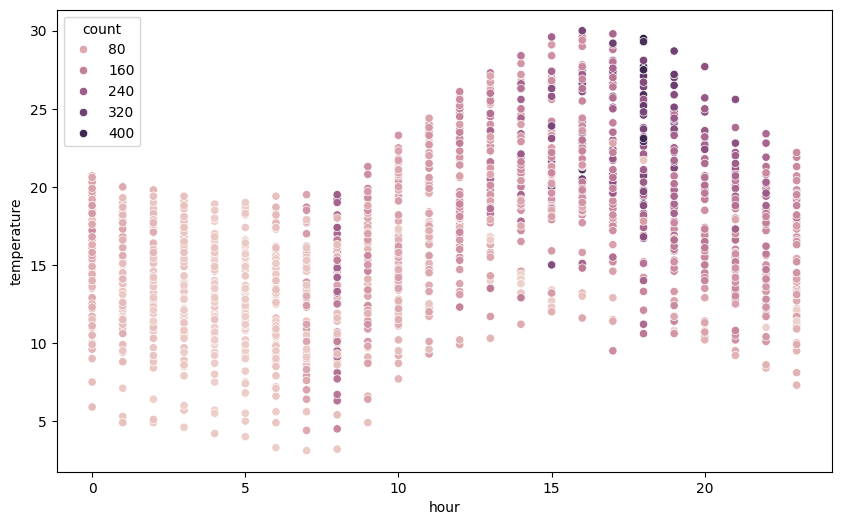

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='hour', y='hour_bef_temperature', hue='count')
plt.ylabel('temperature')
plt.xlabel('hour')
plt.show()

### **시간대별 대여량**

In [ ]:
# 시간대별 평균 대여량
hourly_avg_count = train.groupby('hour')['count'].mean()
hourly_avg_count.head()

hour
0    71.766667
1    47.606557
2    31.409836
3    21.377049
4    13.524590
Name: count, dtype: float64

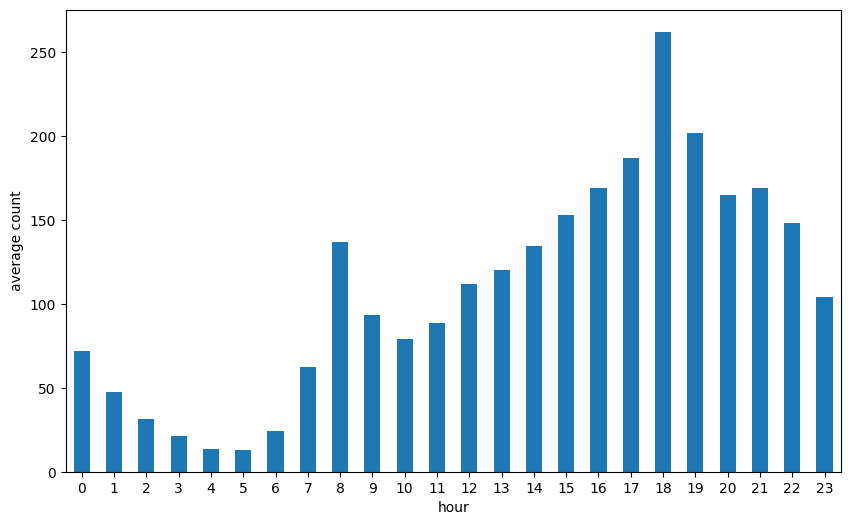

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
hourly_avg_count.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('hour')
plt.ylabel('average count')
plt.show()

- 새벽 시간인 4, 5 시의 대여량이 가장 적고, 18시의 대여량이 가장 많다.
- 5시부터 18시까지 대여량이 증가하다가 감소하는 추세를 보인다.
- 출퇴근 시간에 대여량이 증가한다.

In [ ]:
columns = ['hour_bef_temperature', 'hour_bef_precipitation',
            'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
            'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

hourly_mean = train.groupby('hour')[columns].mean()
hourly_mean.head()

,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
hour,,,,,,,,
0,14.788136,0.016949,1.965517,58.169492,1434.220339,0.033763,55.881356,30.982759
1,14.155738,0.049180,1.836667,60.459016,1400.852459,NaN,NaN,NaN
2,13.747541,0.049180,1.633333,61.721311,1374.278689,0.030492,58.475410,31.366667
3,13.357377,0.032787,1.620000,63.131148,1326.311475,0.031213,59.180328,31.466667
4,13.001639,0.016393,1.409836,64.573770,1264.606557,0.031984,58.278689,32.116667


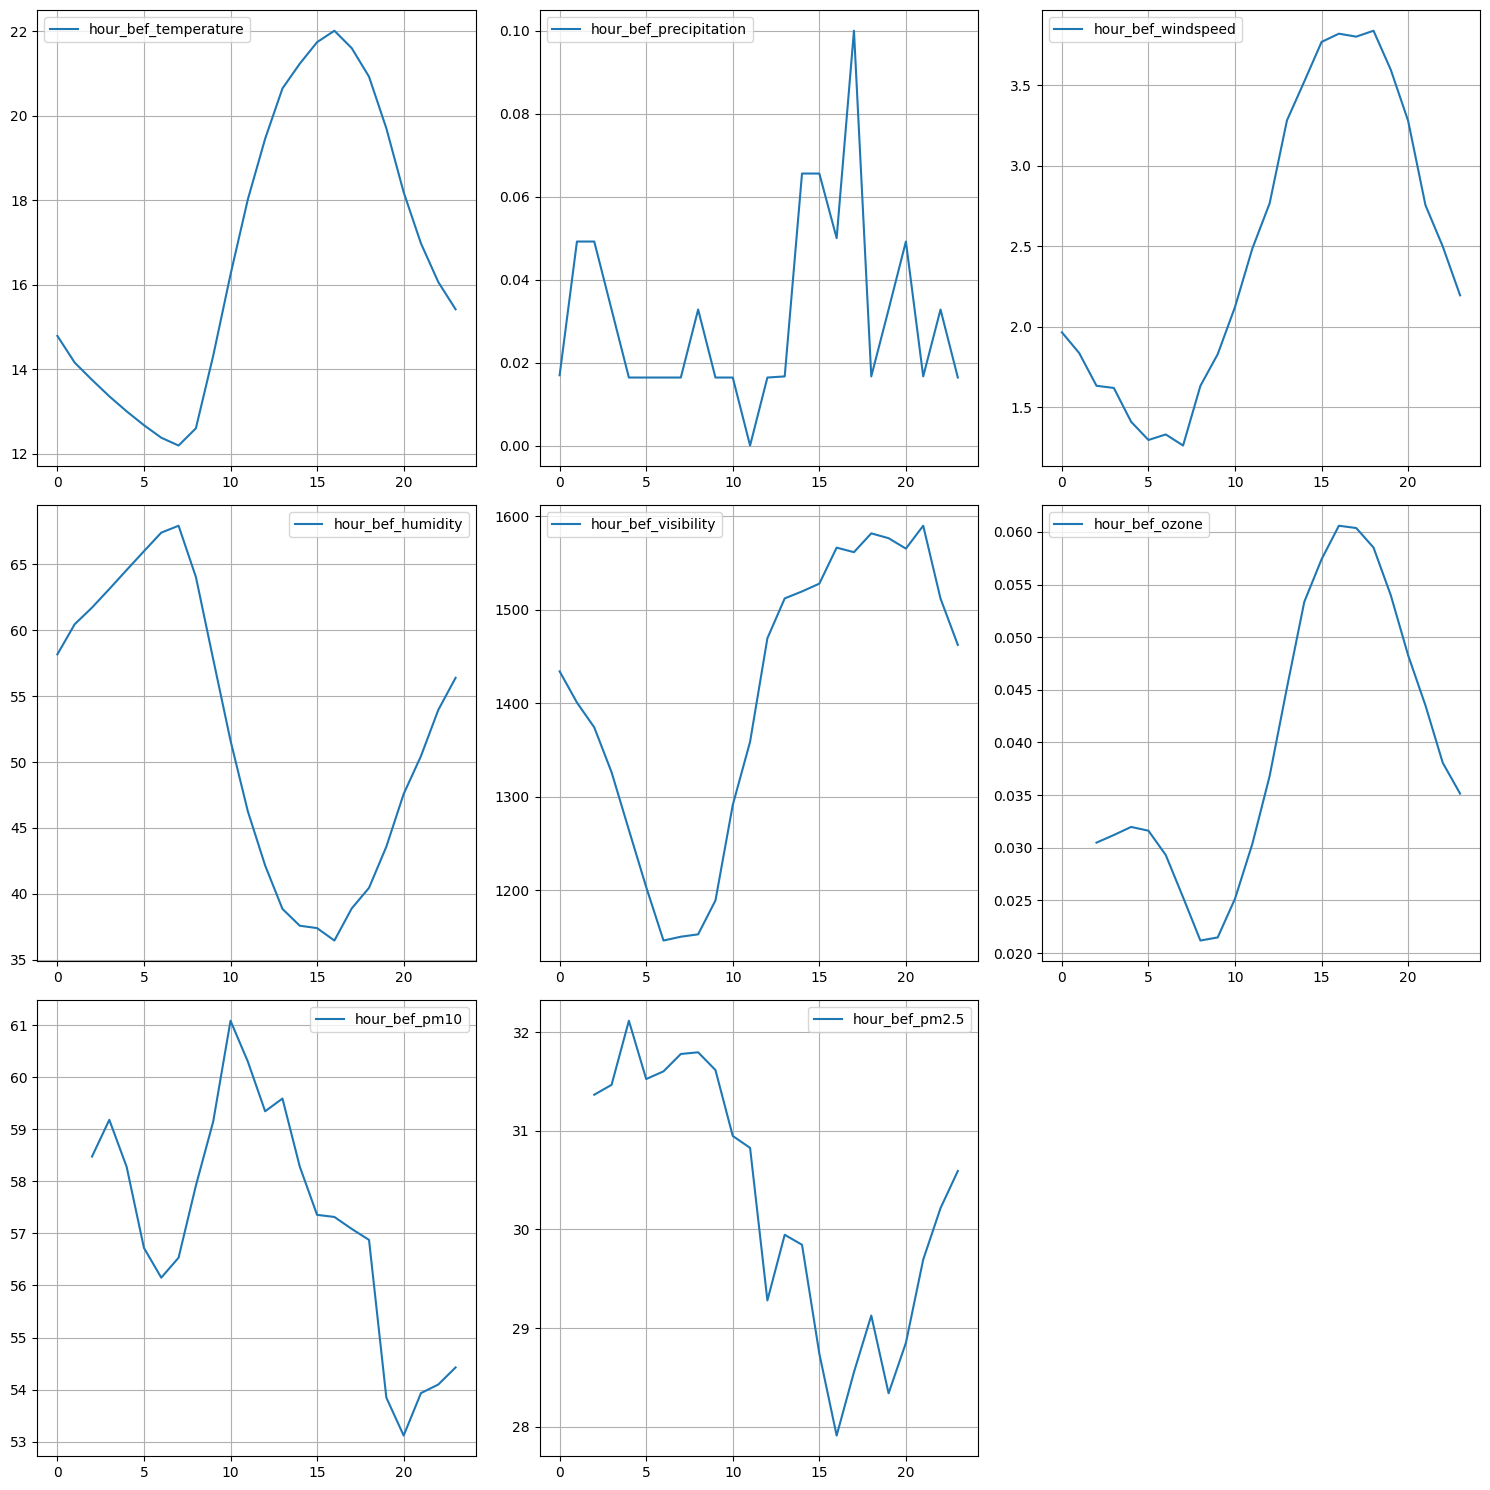

In [ ]:
# subplot으로 그래프 그리기
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        col = columns[i]
        ax.plot(hourly_mean.index, hourly_mean[col], label=col)
        ax.legend()
        ax.grid(True)
    else:
        ax.axis('off')  # 남는 subplot은 빈 공간으로 처리

plt.tight_layout()
plt.show()

- hour_bef_percipitation을 제외하고 hour에 따른 경향성을 보인다.
- 미세먼지, 오존과 관련된 데이터는 앞부분 그래프가 그려지지 않았다.
- 결측치의 분포를 확인해보자.

In [ ]:
# 결측치 데이터의 개수
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
train[(train['hour'] == 1) & ~(train['hour_bef_ozone'].isnull())]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [ ]:
train[(train['hour'] == 1) & ~(train['hour_bef_pm10'].isnull())]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [ ]:
train[(train['hour'] == 1) & ~(train['hour_bef_pm2.5'].isnull())]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


- hour의 값이 1인 데이터 중 hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5가 결측치가 아닌 값이 없다.
- 1시에는 데이터가 측정되지 않았을 수 있음을 추정할 수 있다.

## test

In [ ]:
test.shape

(715, 10)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


- test 데이터셋은 715개의 데이터들로 구성
- 총 10개의 컬럼이 존재 - train은 11개 컬럼으로 정답 데이터인 count 데이터가 없다.

In [ ]:
# 결측치
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [ ]:
# 결측치 데이터의 비율
test.isnull().mean()

id                        0.000000
hour                      0.000000
hour_bef_temperature      0.001399
hour_bef_precipitation    0.001399
hour_bef_windspeed        0.001399
hour_bef_humidity         0.001399
hour_bef_visibility       0.001399
hour_bef_ozone            0.048951
hour_bef_pm10             0.051748
hour_bef_pm2.5            0.050350
dtype: float64

<Axes: >

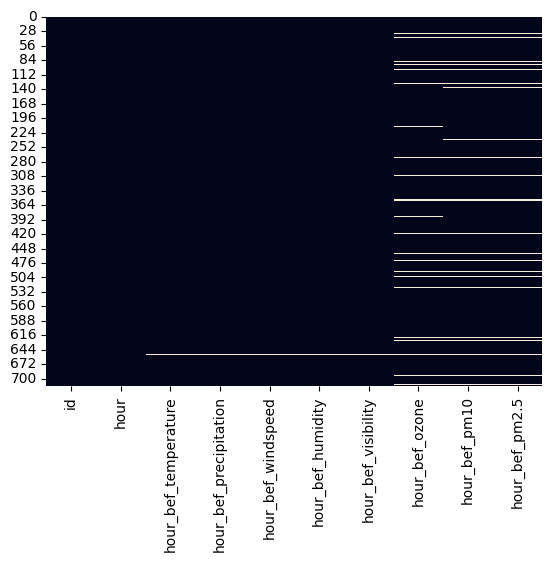

In [ ]:
sns.heatmap(test.isnull(), cbar=False)

- test 데이터에도 결측치가 존재한다.
- train 데이터보다 결측치 비율은 적다.
- test, train 모두 결측치가 hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5에 많이 존재한다.

## submission

In [ ]:
submission.shape

(715, 2)

In [ ]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


- 제출해야 하는 submission 파일의 행이 715개로 test와 같다.
- 제출을 위해 test 데이터를 삭제할 수 없으므로 train 데이터도 결측치 대체 방법을 사용한다.